# Import required packages

In [1]:
import pandas as pd
import utils
import config
import matplotlib.pyplot as plt

The analysis contains:
* 1 Load data: load all required data from *.csv files
* 2 Process data: 
                  - check the basic information of the raw data,
                  - Select columns for further analysis
                  - deal with duplicated rows
                  - deal with missing value
                  - (no numerical value selected)
* 3 Data Analysis

# 1  Load data

In [2]:
candidates_house_of_commons_df = pd.read_csv(config.candidates_house_of_commons_file, encoding='cp1252')
representatives_house_of_commons_df = pd.read_csv(config.representatives_house_of_commons_file, encoding='cp1252')
representatives_df = pd.read_csv(config.representatives_file, encoding='ISO-8859-1')
quebec_assemblee_nationale_df = pd.read_csv(config.quebec_assemblee_nationale_file, encoding='ISO-8859-1')
conseil_municipal_de_montreal_df = pd.read_csv(config.conseil_municipal_de_montreal_file, encoding='ISO-8859-1')

#  2 Process Data

## 2.1 Check Candidates : House of Commons

### 2.1.1 review the first 5 rows of original data

In [3]:
candidates_house_of_commons_df.head()

,District name,Primary role,Name,First name,Last name,Gender,Party name,Email,Photo URL,Source URL,Website,Facebook,Instagram,Twitter,LinkedIn,YouTube,Office type,Address,Phone,Fax
0,Abbotsford,candidate,Ed Fast,Ed,Fast,NaN,Conservative,info@edfast.ca,http://www.ourcommons.ca/Parliamentarians/Imag...,NaN,http://edfast.ca,https://www.facebook.com/EdFastMP/,NaN,https://twitter.com/HonEdFast,NaN,NaN,legislature,NaN,1 604 557-7888,NaN
1,Abbotsford,candidate,James Duncan,James,Duncan,NaN,People's Party,info@ppcabbotsford.ca,NaN,NaN,https://ppcabbotsford.ca/,https://www.facebook.com/ppcabbotsford/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abbotsford,candidate,Madeleine Sauvé,Madeleine,Sauvé,NaN,NDP,madeleine.sauve@ndp.ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abbotsford,candidate,Seamus Heffernan,Seamus,Heffernan,NaN,Liberal,info@seamusheffernan.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abbotsford,candidate,Stephen Fowler,Stephen,Fowler,NaN,Green Party,stephen.fowler@greenparty.ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**check the data column information**

In [4]:
candidates_house_of_commons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 20 columns):
District name    1432 non-null object
Primary role     1432 non-null object
Name             1432 non-null object
First name       1432 non-null object
Last name        1432 non-null object
Gender           0 non-null float64
Party name       1431 non-null object
Email            1374 non-null object
Photo URL        275 non-null object
Source URL       0 non-null float64
Website          465 non-null object
Facebook         862 non-null object
Instagram        0 non-null float64
Twitter          775 non-null object
LinkedIn         0 non-null float64
YouTube          0 non-null float64
Office type      696 non-null object
Address          0 non-null float64
Phone            696 non-null object
Fax              0 non-null float64
dtypes: float64(7), object(13)
memory usage: 223.9+ KB


###  2.1.2 Drop unneeded columns

In [5]:
col_candidates_house_of_commons_df = candidates_house_of_commons_df.columns.values
col_candidates_house_of_commons_df

array(['District name', 'Primary role', 'Name', 'First name', 'Last name',
       'Gender', 'Party name', 'Email', 'Photo URL', 'Source URL',
       'Website', 'Facebook', 'Instagram', 'Twitter', 'LinkedIn',
       'YouTube', 'Office type', 'Address', 'Phone', 'Fax'], dtype=object)

**Select the columns of \[ 'District name', 'Primary role', 'Name', 'First name', 'Last name', 'Party name' \] for further analysis**

In [6]:
candidates_house_of_commons_df = candidates_house_of_commons_df[['District name', 'Primary role', 'Name', 'First name', 'Last name', 'Party name']]
candidates_house_of_commons_df.head()

,District name,Primary role,Name,First name,Last name,Party name
0,Abbotsford,candidate,Ed Fast,Ed,Fast,Conservative
1,Abbotsford,candidate,James Duncan,James,Duncan,People's Party
2,Abbotsford,candidate,Madeleine Sauvé,Madeleine,Sauvé,NDP
3,Abbotsford,candidate,Seamus Heffernan,Seamus,Heffernan,Liberal
4,Abbotsford,candidate,Stephen Fowler,Stephen,Fowler,Green Party


### 2.1.3 Deal with duplicated rows

In [7]:
if any(candidates_house_of_commons_df.duplicated()):
    print('Duplicated data exist!')
else:
    print('No duplicated data!')

No duplicated data!


### 2.1.4 Deal with missing values

In [8]:
candidates_house_of_commons_df.isnull().any()

District name    False
Primary role     False
Name             False
First name       False
Last name        False
Party name        True
dtype: bool

In [9]:
candidates_house_of_commons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 6 columns):
District name    1432 non-null object
Primary role     1432 non-null object
Name             1432 non-null object
First name       1432 non-null object
Last name        1432 non-null object
Party name       1431 non-null object
dtypes: object(6)
memory usage: 67.2+ KB


In [10]:
candidates_house_of_commons_df[candidates_house_of_commons_df['Party name'].isnull()]

,District name,Primary role,Name,First name,Last name,Party name
1424,Yorkton—Melville,candidate,Ryan Schultz,Ryan,Schultz,NaN


* Since only one value misses from 'Party name', we leave it at this moment.

## 2.2 Check Representatives : All elected officials

### 2.2.1 review the first 5 rows of original data

In [11]:
representatives_df.head()

,Organization,District name,Primary role,Name,First name,Last name,Gender,Party name,Email,Photo URL,...,LinkedIn,YouTube,Office type,Address,Phone,Fax,Office type.1,Address.1,Phone.1,Fax.1
0,Legislative Assembly of Alberta,Airdrie-Cochrane,MLA,Pete Guthrie,Pete,Guthrie,NaN,United Conservative Party,Airdrie.Cochrane@assembly.ab.ca,http://www.assembly.ab.ca/lao/mla/photos/m/ph-...,...,NaN,NaN,legislature,NaN,1 587 493-2050,1 587 493-9562,NaN,NaN,NaN,NaN
1,Legislative Assembly of Alberta,Airdrie-East,MLA,Angela Pitt,Angela,Pitt,NaN,United Conservative Party,Airdrie.East@assembly.ab.ca,http://www.assembly.ab.ca/lao/mla/photos/m/ph-...,...,NaN,NaN,legislature,NaN,1 403 948-8741,1 403 948-8744,NaN,NaN,NaN,NaN
2,Legislative Assembly of Alberta,Athabasca-Barrhead-Westlock,MLA,Glenn van Dijken,Glenn van,Dijken,NaN,United Conservative Party,Athabasca.Barrhead.Westlock@assembly.ab.ca,http://www.assembly.ab.ca/lao/mla/photos/m/ph-...,...,NaN,NaN,legislature,NaN,1 780 674-3225,1 780 674-6183,NaN,NaN,NaN,NaN
3,Legislative Assembly of Alberta,Banff-Kananaskis,MLA,Miranda Rosin,Miranda,Rosin,NaN,United Conservative Party,Banff.Kananaskis@assembly.ab.ca,http://www.assembly.ab.ca/lao/mla/photos/m/ph-...,...,NaN,NaN,legislature,NaN,1 403 609-4509,1 403 609-4513,NaN,NaN,NaN,NaN
4,Legislative Assembly of Alberta,Bonnyville-Cold Lake-St. Paul,MLA,David B. Hanson,David B.,Hanson,NaN,United Conservative Party,Bonnyville.ColdLake.StPaul@assembly.ab.ca,http://www.assembly.ab.ca/lao/mla/photos/m/ph-...,...,NaN,NaN,legislature,NaN,1 780 826-5658,1 780 826-2165,NaN,NaN,NaN,NaN


In [12]:
representatives_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 25 columns):
Organization     1637 non-null object
District name    1637 non-null object
Primary role     1637 non-null object
Name             1637 non-null object
First name       1637 non-null object
Last name        1637 non-null object
Gender           319 non-null object
Party name       396 non-null object
Email            1530 non-null object
Photo URL        1108 non-null object
Source URL       848 non-null object
Website          525 non-null object
Facebook         162 non-null object
Instagram        0 non-null float64
Twitter          187 non-null object
LinkedIn         0 non-null float64
YouTube          7 non-null object
Office type      1404 non-null object
Address          505 non-null object
Phone            1347 non-null object
Fax              357 non-null object
Office type.1    237 non-null object
Address.1        87 non-null object
Phone.1          237 non-null object


###  2.2.2 Drop unneeded columns

In [13]:
col_representatives_df = representatives_df.columns.values
col_representatives_df

array(['Organization', 'District name', 'Primary role', 'Name',
       'First name', 'Last name', 'Gender', 'Party name', 'Email',
       'Photo URL', 'Source URL', 'Website', 'Facebook', 'Instagram',
       'Twitter', 'LinkedIn', 'YouTube', 'Office type', 'Address',
       'Phone', 'Fax', 'Office type.1', 'Address.1', 'Phone.1', 'Fax.1'],
      dtype=object)

**Select columns \[ 'Organization', 'District name', 'Primary role', 'Name', 'First name', 'Last name','Gender', 'Party name', 'Office type' \] for furthure analysis.**

In [14]:
representatives_df = representatives_df[['Organization', 'District name', 'Primary role', 'Name', 'First name', 'Last name','Gender', 'Party name', 'Office type']]
representatives_df.head()

,Organization,District name,Primary role,Name,First name,Last name,Gender,Party name,Office type
0,Legislative Assembly of Alberta,Airdrie-Cochrane,MLA,Pete Guthrie,Pete,Guthrie,NaN,United Conservative Party,legislature
1,Legislative Assembly of Alberta,Airdrie-East,MLA,Angela Pitt,Angela,Pitt,NaN,United Conservative Party,legislature
2,Legislative Assembly of Alberta,Athabasca-Barrhead-Westlock,MLA,Glenn van Dijken,Glenn van,Dijken,NaN,United Conservative Party,legislature
3,Legislative Assembly of Alberta,Banff-Kananaskis,MLA,Miranda Rosin,Miranda,Rosin,NaN,United Conservative Party,legislature
4,Legislative Assembly of Alberta,Bonnyville-Cold Lake-St. Paul,MLA,David B. Hanson,David B.,Hanson,NaN,United Conservative Party,legislature


### 2.2.3 Deal with duplicated rows

In [15]:
if any(representatives_df.duplicated()):
    print('Duplicated data exist!')
else:
    print('No duplicated data!')

Duplicated data exist!


In [16]:
representatives_df.duplicated().any().sum()

1

In [17]:
representatives_df[representatives_df.duplicated()==True]

,Organization,District name,Primary role,Name,First name,Last name,Gender,Party name,Office type
843,Ontario English Public School Boards,Algoma DSB,Trustee,Sandra Edwards,Sandra,Edwards,NaN,NaN,legislature


In [18]:
representatives_df.drop_duplicates(keep='last', inplace=True)

In [19]:
if any(representatives_df.duplicated()):
    print('Duplicated data exist!')
else:
    print('No duplicated data!')

No duplicated data!


### 2.2.4 Deal with missing values

In [20]:
representatives_df.isnull().any()

Organization     False
District name    False
Primary role     False
Name             False
First name       False
Last name        False
Gender            True
Party name        True
Office type       True
dtype: bool

In [21]:
representatives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1636 entries, 0 to 1636
Data columns (total 9 columns):
Organization     1636 non-null object
District name    1636 non-null object
Primary role     1636 non-null object
Name             1636 non-null object
First name       1636 non-null object
Last name        1636 non-null object
Gender           319 non-null object
Party name       396 non-null object
Office type      1403 non-null object
dtypes: object(9)
memory usage: 127.8+ KB


* There are a lot of information missing from 'Gender' and 'Party name'. But we are still interested i these two information, sp we keep them right now.

## 2.3  Check Representative : House of Commons

### 2.3.1 review the first 5 rows of original data

In [22]:
representatives_house_of_commons_df.head()

,District name,Primary role,Name,First name,Last name,Gender,Party name,Email,Photo URL,Source URL,...,Phone.2,Fax.2,Office type.3,Address.3,Phone.3,Fax.3,Office type.4,Address.4,Phone.4,Fax.4
0,Abbotsford,MP,Ed Fast,Ed,Fast,NaN,Conservative,ed.fast@parl.gc.ca,http://www.ourcommons.ca/Parliamentarians/Imag...,http://www.parl.gc.ca/Parliamentarians/en/memb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abitibi—Baie-James—Nunavik—Eeyou,MP,Romeo Saganash,Romeo,Saganash,NaN,NDP,Romeo.Saganash@parl.gc.ca,http://www.ourcommons.ca/Parliamentarians/Imag...,http://www.parl.gc.ca/Parliamentarians/en/memb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abitibi—Témiscamingue,MP,Christine Moore,Christine,Moore,NaN,NDP,Christine.Moore@parl.gc.ca,http://www.ourcommons.ca/Parliamentarians/Imag...,http://www.parl.gc.ca/Parliamentarians/en/memb...,...,1 819 629-2726,NaN,constituency,554 1st Avenue West\nSuite 101\nAmos QC J9T 1V3,1 819 732-2266,NaN,constituency,81-A 5th Avenue East\n\nLa Sarre QC J9Z 1T1,1 819 339-2266,NaN
3,Acadie—Bathurst,MP,Serge Cormier,Serge,Cormier,NaN,Liberal,Serge.Cormier@parl.gc.ca,http://www.ourcommons.ca/Parliamentarians/Imag...,http://www.parl.gc.ca/Parliamentarians/en/memb...,...,1 506 350-5398,1 506 546-3045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahuntsic-Cartierville,MP,Mélanie Joly,Mélanie,Joly,NaN,Liberal,Melanie.Joly@parl.gc.ca,http://www.ourcommons.ca/Parliamentarians/Imag...,http://www.parl.gc.ca/Parliamentarians/en/memb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
representatives_house_of_commons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 36 columns):
District name    333 non-null object
Primary role     333 non-null object
Name             333 non-null object
First name       333 non-null object
Last name        333 non-null object
Gender           0 non-null float64
Party name       333 non-null object
Email            328 non-null object
Photo URL        332 non-null object
Source URL       333 non-null object
Website          308 non-null object
Facebook         3 non-null object
Instagram        0 non-null float64
Twitter          0 non-null float64
LinkedIn         0 non-null float64
YouTube          0 non-null float64
Office type      333 non-null object
Address          333 non-null object
Phone            333 non-null object
Fax              333 non-null object
Office type.1    333 non-null object
Address.1        333 non-null object
Phone.1          333 non-null object
Fax.1            329 non-null object
Office type.2 

###  2.3.2 Drop unneeded columns

In [24]:
col_representatives_house_of_commons_df = representatives_house_of_commons_df.columns.values
col_representatives_house_of_commons_df

array(['District name', 'Primary role', 'Name', 'First name', 'Last name',
       'Gender', 'Party name', 'Email', 'Photo URL', 'Source URL',
       'Website', 'Facebook', 'Instagram', 'Twitter', 'LinkedIn',
       'YouTube', 'Office type', 'Address', 'Phone', 'Fax',
       'Office type.1', 'Address.1', 'Phone.1', 'Fax.1', 'Office type.2',
       'Address.2', 'Phone.2', 'Fax.2', 'Office type.3', 'Address.3',
       'Phone.3', 'Fax.3', 'Office type.4', 'Address.4', 'Phone.4',
       'Fax.4'], dtype=object)

**Select columns \[ 'District name', 'Primary role', 'Name', 'First name', 'Last name', 'Party name', 'Office type'\] for further analysis.**

In [25]:
representatives_house_of_commons_df = representatives_house_of_commons_df[[ 'District name', 'Primary role', 'Name', 'First name', 'Last name', 'Party name', 'Office type']]
representatives_house_of_commons_df.head()

,District name,Primary role,Name,First name,Last name,Party name,Office type
0,Abbotsford,MP,Ed Fast,Ed,Fast,Conservative,legislature
1,Abitibi—Baie-James—Nunavik—Eeyou,MP,Romeo Saganash,Romeo,Saganash,NDP,legislature
2,Abitibi—Témiscamingue,MP,Christine Moore,Christine,Moore,NDP,legislature
3,Acadie—Bathurst,MP,Serge Cormier,Serge,Cormier,Liberal,legislature
4,Ahuntsic-Cartierville,MP,Mélanie Joly,Mélanie,Joly,Liberal,legislature


### 2.3.3 Deal with duplicated rows

In [26]:
if any(representatives_house_of_commons_df.duplicated()):
    print('Duplicated data exist!')
else:
    print('No duplicated data!')

No duplicated data!


### 2.3.4 Deal with missing values

In [27]:
representatives_house_of_commons_df.isnull().any()

District name    False
Primary role     False
Name             False
First name       False
Last name        False
Party name       False
Office type      False
dtype: bool

In [28]:
representatives_house_of_commons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
District name    333 non-null object
Primary role     333 non-null object
Name             333 non-null object
First name       333 non-null object
Last name        333 non-null object
Party name       333 non-null object
Office type      333 non-null object
dtypes: object(7)
memory usage: 18.3+ KB


In [29]:
representatives_house_of_commons_df['Party name'].unique()

array(['Conservative', 'NDP', 'Liberal', "People's Party", 'Independent',
       'Bloc Québécois', 'Green Party',
       'Co-operative Commonwealth Federation'], dtype=object)

## 2.4 Check Provincial legislatures : Assemblée nationale du Québec

### 2.4.1 review the first 5 rows of original data

In [30]:
quebec_assemblee_nationale_df.head()

,District name,Primary role,Name,First name,Last name,Gender,Party name,Email,Photo URL,Source URL,...,LinkedIn,YouTube,Office type,Address,Phone,Fax,Office type.1,Address.1,Phone.1,Fax.1
0,Abitibi-Est,MNA,Pierre Dufour,Pierre,Dufour,NaN,Coalition avenir Québec,Pierre.Dufour.ABES@assnat.qc.ca,http://www.assnat.qc.ca/Media/Process.aspx?ass...,http://www.assnat.qc.ca/fr/deputes/dufour-pier...,...,NaN,NaN,legislature,NaN,1 418 643-7295,NaN,constituency,NaN,1 819 824-3333,NaN
1,Abitibi-Ouest,MNA,Suzanne Blais,Suzanne,Blais,NaN,Coalition avenir Québec,Suzanne.Blais.ABOU@assnat.qc.ca,http://www.assnat.qc.ca/Media/Process.aspx?ass...,http://www.assnat.qc.ca/fr/deputes/blais-suzan...,...,NaN,NaN,legislature,NaN,1 581 628-1857,NaN,constituency,NaN,1 819 444-5007,NaN
2,Acadie,MNA,Christine St-Pierre,Christine,St-Pierre,NaN,Parti libéral du Québec,Christine.St-Pierre.ACAD@assnat.qc.ca,http://www.assnat.qc.ca/Media/Process.aspx?ass...,http://www.assnat.qc.ca/fr/deputes/st-pierre-c...,...,NaN,NaN,legislature,NaN,1 581 628-1773,NaN,constituency,NaN,1 514 337-4278,NaN
3,Anjou-Louis-Riel,MNA,Lise Thériault,Lise,Thériault,NaN,Parti libéral du Québec,ltheriault-anjo@assnat.qc.ca,http://www.assnat.qc.ca/Media/Process.aspx?ass...,http://www.assnat.qc.ca/fr/deputes/theriault-l...,...,NaN,NaN,legislature,NaN,1 581 628-1775,NaN,constituency,NaN,1 514 493-9630,NaN
4,Argenteuil,MNA,Agnès Grondin,Agnès,Grondin,NaN,Coalition avenir Québec,Agnes.Grondin.ARGE@assnat.qc.ca,http://www.assnat.qc.ca/Media/Process.aspx?ass...,http://www.assnat.qc.ca/fr/deputes/grondin-agn...,...,NaN,NaN,legislature,NaN,1 418 528-6379,NaN,constituency,NaN,1 450 562-0785,NaN


In [31]:
quebec_assemblee_nationale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 24 columns):
District name    124 non-null object
Primary role     124 non-null object
Name             124 non-null object
First name       124 non-null object
Last name        124 non-null object
Gender           0 non-null float64
Party name       124 non-null object
Email            123 non-null object
Photo URL        124 non-null object
Source URL       124 non-null object
Website          0 non-null float64
Facebook         120 non-null object
Instagram        0 non-null float64
Twitter          121 non-null object
LinkedIn         0 non-null float64
YouTube          0 non-null float64
Office type      124 non-null object
Address          0 non-null float64
Phone            124 non-null object
Fax              0 non-null float64
Office type.1    121 non-null object
Address.1        0 non-null float64
Phone.1          121 non-null object
Fax.1            0 non-null float64
dtypes: float64(

###  2.4.2 Drop unneeded columns

In [32]:
col_quebec_assemblee_nationale_df = quebec_assemblee_nationale_df.columns.values
col_quebec_assemblee_nationale_df

array(['District name', 'Primary role', 'Name', 'First name', 'Last name',
       'Gender', 'Party name', 'Email', 'Photo URL', 'Source URL',
       'Website', 'Facebook', 'Instagram', 'Twitter', 'LinkedIn',
       'YouTube', 'Office type', 'Address', 'Phone', 'Fax',
       'Office type.1', 'Address.1', 'Phone.1', 'Fax.1'], dtype=object)

**Select columns \[ 'District name', 'Primary role', 'Name', 'First name', 'Last name', 'Party name', 'Office type'\] for further analysis.**

In [33]:
quebec_assemblee_nationale_df = quebec_assemblee_nationale_df[['District name', 'Primary role', 'Name', 'First name', 'Last name', 'Party name', 'Office type']]
quebec_assemblee_nationale_df.head()

,District name,Primary role,Name,First name,Last name,Party name,Office type
0,Abitibi-Est,MNA,Pierre Dufour,Pierre,Dufour,Coalition avenir Québec,legislature
1,Abitibi-Ouest,MNA,Suzanne Blais,Suzanne,Blais,Coalition avenir Québec,legislature
2,Acadie,MNA,Christine St-Pierre,Christine,St-Pierre,Parti libéral du Québec,legislature
3,Anjou-Louis-Riel,MNA,Lise Thériault,Lise,Thériault,Parti libéral du Québec,legislature
4,Argenteuil,MNA,Agnès Grondin,Agnès,Grondin,Coalition avenir Québec,legislature


### 2.4.3 Deal with duplicated rows

In [34]:
if any(quebec_assemblee_nationale_df.duplicated()):
    print('Duplicated data exist!')
else:
    print('No duplicated data!')

No duplicated data!


### 2.4.4 Deal with missing values

In [35]:
quebec_assemblee_nationale_df.isnull().any()

District name    False
Primary role     False
Name             False
First name       False
Last name        False
Party name       False
Office type      False
dtype: bool

In [36]:
quebec_assemblee_nationale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
District name    124 non-null object
Primary role     124 non-null object
Name             124 non-null object
First name       124 non-null object
Last name        124 non-null object
Party name       124 non-null object
Office type      124 non-null object
dtypes: object(7)
memory usage: 6.9+ KB


## 2.5 Check Quebec councils : Conseil municipal de Montréal

### 2.5.1 review the first 5 rows of original data

In [37]:
conseil_municipal_de_montreal_df.head()

,District name,Primary role,Name,First name,Last name,Gender,Party name,Email,Photo URL,Source URL,Website,Facebook,Instagram,Twitter,LinkedIn,YouTube,Office type,Address,Phone,Fax
0,Ahuntsic,Conseiller de la ville,Nathalie Goulet,Nathalie,Goulet,F,Projet Montréal - Équipe Valérie Plante,nathalie.goulet@ville.montreal.qc.ca,http://ville.montreal.qc.ca/pls/portal/docs/PA...,http://ville.montreal.qc.ca/portal/page?_pagei...,NaN,NaN,NaN,NaN,NaN,NaN,legislature,"555, rue Chabanel Ouest\nbureau 600\nMontréal ...",1 514 872-2246,1 514 868-3324
1,Ahuntsic-Cartierville,Maire d'arrondissement,Émilie Thuillier,Émilie,Thuillier,F,Projet Montréal - Équipe Valérie Plante,emilie.thuillier@ville.montreal.qc.ca,http://ville.montreal.qc.ca/pls/portal/docs/PA...,http://ville.montreal.qc.ca/portal/page?_pagei...,NaN,NaN,NaN,NaN,NaN,NaN,legislature,"555, rue Chabanel Ouest\nbureau 600\nMontréal ...",1 514 872-2246,1 514 868-3324
2,Anjou,Conseiller de la ville,Andrée Hénault,Andrée,Hénault,F,Équipe Anjou,ahenault@ville.montreal.qc.ca,http://ville.montreal.qc.ca/pls/portal/docs/PA...,http://ville.montreal.qc.ca/portal/page?_pagei...,NaN,NaN,NaN,NaN,NaN,NaN,legislature,7701 Boul Louis-H.-Lafontaine\nAnjou QC H1K 4B9,1 514 493-8051,1 514 493-8013
3,Anjou,Maire d'arrondissement,Luis Miranda,Luis,Miranda,M,Équipe Anjou,lmiranda@ville.montreal.qc.ca,http://ville.montreal.qc.ca/pls/portal/docs/PA...,http://ville.montreal.qc.ca/portal/page?_pagei...,NaN,NaN,NaN,NaN,NaN,NaN,legislature,7701 Boul Louis-H.-Lafontaine\nAnjou QC H1K 4B9,1 514 493-8010,1 514 493-8013
4,Bois-de-Liesse,Conseiller de la ville,Benoit Langevin,Benoit,Langevin,M,Ensemble Montréal,benoitm.langevin@ville.montreal.qc.ca,http://ville.montreal.qc.ca/pls/portal/docs/PA...,http://ville.montreal.qc.ca/portal/page?_pagei...,NaN,NaN,NaN,NaN,NaN,NaN,legislature,"13665, boul. de Pierrefonds\nPierrefonds QC H...",1 514 624-1488,1 514 624-1415


In [38]:
conseil_municipal_de_montreal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 20 columns):
District name    64 non-null object
Primary role     64 non-null object
Name             64 non-null object
First name       64 non-null object
Last name        64 non-null object
Gender           64 non-null object
Party name       64 non-null object
Email            63 non-null object
Photo URL        64 non-null object
Source URL       64 non-null object
Website          0 non-null float64
Facebook         0 non-null float64
Instagram        0 non-null float64
Twitter          0 non-null float64
LinkedIn         0 non-null float64
YouTube          0 non-null float64
Office type      63 non-null object
Address          63 non-null object
Phone            61 non-null object
Fax              62 non-null object
dtypes: float64(6), object(14)
memory usage: 10.1+ KB


###  2.5.2 Drop unneeded columns

In [39]:
col_conseil_municipal_de_montreal_df = conseil_municipal_de_montreal_df.columns.values
col_conseil_municipal_de_montreal_df

array(['District name', 'Primary role', 'Name', 'First name', 'Last name',
       'Gender', 'Party name', 'Email', 'Photo URL', 'Source URL',
       'Website', 'Facebook', 'Instagram', 'Twitter', 'LinkedIn',
       'YouTube', 'Office type', 'Address', 'Phone', 'Fax'], dtype=object)

**Select columns \[ 'District name', 'Primary role', 'Name', 'First name', 'Last name', 'Gender', 'Party name', 'Office type'\] for further analysis.**

In [40]:
conseil_municipal_de_montreal_df = conseil_municipal_de_montreal_df[['District name', 'Primary role', 'Name', 'First name', 'Last name', 'Gender', 'Party name', 'Office type']]
conseil_municipal_de_montreal_df.head()

,District name,Primary role,Name,First name,Last name,Gender,Party name,Office type
0,Ahuntsic,Conseiller de la ville,Nathalie Goulet,Nathalie,Goulet,F,Projet Montréal - Équipe Valérie Plante,legislature
1,Ahuntsic-Cartierville,Maire d'arrondissement,Émilie Thuillier,Émilie,Thuillier,F,Projet Montréal - Équipe Valérie Plante,legislature
2,Anjou,Conseiller de la ville,Andrée Hénault,Andrée,Hénault,F,Équipe Anjou,legislature
3,Anjou,Maire d'arrondissement,Luis Miranda,Luis,Miranda,M,Équipe Anjou,legislature
4,Bois-de-Liesse,Conseiller de la ville,Benoit Langevin,Benoit,Langevin,M,Ensemble Montréal,legislature


### 2.5.3 Deal with duplicated rows

In [41]:
if any(conseil_municipal_de_montreal_df.duplicated()):
    print('Duplicated data exist!')
else:
    print('No duplicated data!')

No duplicated data!


### 2.5.4 Deal with missing values

In [42]:
conseil_municipal_de_montreal_df.isnull().any()

District name    False
Primary role     False
Name             False
First name       False
Last name        False
Gender           False
Party name       False
Office type       True
dtype: bool

In [43]:
conseil_municipal_de_montreal_df[conseil_municipal_de_montreal_df['Office type'].isnull()]

,District name,Primary role,Name,First name,Last name,Gender,Party name,Office type
30,Montréal,Maire de la Ville de Montréal,Valérie Plante,Valérie,Plante,F,Projet Montréal - Équipe Valérie Plante,NaN


* Since only one 'Office Type' misses, we leave it now.

In [44]:
conseil_municipal_de_montreal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
District name    64 non-null object
Primary role     64 non-null object
Name             64 non-null object
First name       64 non-null object
Last name        64 non-null object
Gender           64 non-null object
Party name       64 non-null object
Office type      63 non-null object
dtypes: object(8)
memory usage: 4.1+ KB


# 3 Data Analysis

In [45]:
def draw_barh(serr, title_pic, save_path):
    row_name = list(serr.index)
    row_name.reverse()

    fig, ax = plt.subplots(figsize=(10,5))
    b = ax.barh(serr.index, serr.values, color='#6699CC')

    for rect in b:
        w = rect.get_width()
        ax.text(w, rect.get_y()+rect.get_height()/2, '%d' %
                int(w), ha='left', va='center')

    ax.set_yticks(range(len(row_name)))
    ax.set_yticklabels(list(serr.index))

    plt.xticks(())

    plt.title(title_pic, loc='center', fontsize='15',
              fontweight='bold')
    plt.savefig(save_path)
    plt.show()

## 3.1 Analyze Candidates : House of Commons

In [46]:
candidates_house_of_commons_df.head()

,District name,Primary role,Name,First name,Last name,Party name
0,Abbotsford,candidate,Ed Fast,Ed,Fast,Conservative
1,Abbotsford,candidate,James Duncan,James,Duncan,People's Party
2,Abbotsford,candidate,Madeleine Sauvé,Madeleine,Sauvé,NDP
3,Abbotsford,candidate,Seamus Heffernan,Seamus,Heffernan,Liberal
4,Abbotsford,candidate,Stephen Fowler,Stephen,Fowler,Green Party


In [47]:
len(candidates_house_of_commons_df['Primary role'].unique())

1

In [48]:
len(candidates_house_of_commons_df['District name'].unique())

338

In [49]:
candidates_house_of_commons_df['Party name'].unique()

array(['Conservative', "People's Party", 'NDP', 'Liberal', 'Green Party',
       'Bloc Québécois', 'Communist Party of Canada',
       'Animal Protection Party of Canada',
       'Marxist-Leninist Party of Canada', nan], dtype=object)

In [50]:
len(candidates_house_of_commons_df['Party name'].unique())

10

* Group by 'Party name'

In [51]:
obj = candidates_house_of_commons_df.groupby('Party name')

obj.size()

Party name
Animal Protection Party of Canada      2
Bloc Québécois                        76
Communist Party of Canada              2
Conservative                         333
Green Party                          239
Liberal                              309
Marxist-Leninist Party of Canada       1
NDP                                  338
People's Party                       131
dtype: int64

In [52]:
serr=pd.Series(obj.size()).sort_values(ascending=True)

serr.index

Index(['Marxist-Leninist Party of Canada', 'Animal Protection Party of Canada',
       'Communist Party of Canada', 'Bloc Québécois', 'People's Party',
       'Green Party', 'Liberal', 'Conservative', 'NDP'],
      dtype='object', name='Party name')

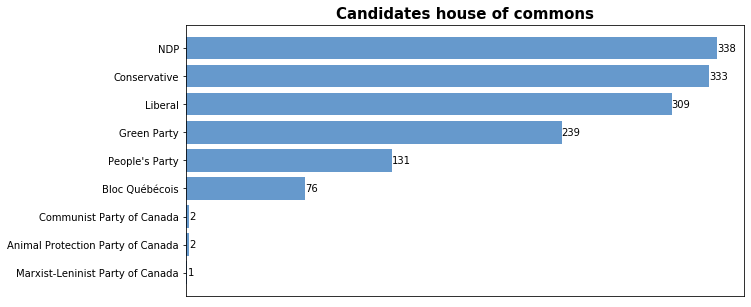

In [53]:
draw_barh(serr, 'Candidates house of commons', './outputFile/Candidates house of commons.png')

* Group by 'District name'. There 338 different 'District name'. We find the Top 10 district of the Hosue of Commons candidates

In [54]:
obj = candidates_house_of_commons_df.groupby('District name')
obj.size()

District name
Abbotsford                          5
Abitibi—Baie-James—Nunavik—Eeyou    6
Abitibi—Témiscamingue               6
Acadie—Bathurst                     3
Ahuntsic-Cartierville               6
                                   ..
York Centre                         4
York South—Weston                   3
Yorkton—Melville                    5
York—Simcoe                         2
Yukon                               4
Length: 338, dtype: int64

In [55]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr.index

Index(['Carlton Trail—Eagle Creek', 'Windsor—Tecumseh',
       'Medicine Hat—Cardston—Warner', 'Peace River—Westlock', 'Bow River',
       'Cape Breton—Canso', 'Edmonton Griesbach', 'Grande Prairie—Mackenzie',
       'Calgary Nose Hill', 'York—Simcoe',
       ...
       'Mount Royal', 'Nepean', 'Dorval—Lachine—LaSalle', 'Compton—Stanstead',
       'Louis-Saint-Laurent', 'Rosemont—La Petite-Patrie', 'Trois-Rivières',
       'Saint-Léonard—Saint-Michel', 'Portneuf—Jacques-Cartier',
       'University—Rosedale'],
      dtype='object', name='District name', length=338)

In [56]:
serr=serr[len(serr)-10:len(serr)]
serr

District name
Mount Royal                   6
Nepean                        6
Dorval—Lachine—LaSalle        6
Compton—Stanstead             6
Louis-Saint-Laurent           6
Rosemont—La Petite-Patrie     6
Trois-Rivières                6
Saint-Léonard—Saint-Michel    6
Portneuf—Jacques-Cartier      6
University—Rosedale           8
dtype: int64

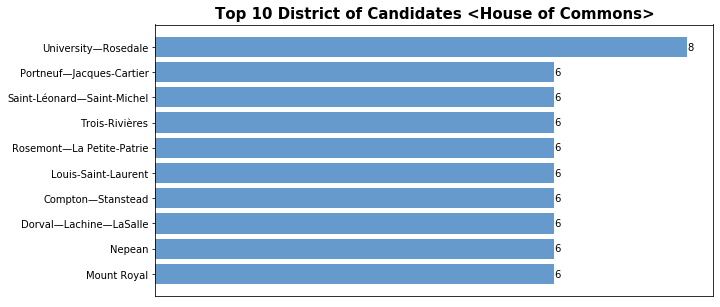

In [57]:
draw_barh(serr, 'Top 10 District of Candidates <House of Commons>', './outputFile/Top 10 District of Candidates House of Commons.png')

## 3.2 Analyze Representatives : All elected officials

In [58]:
representatives_df.head()

,Organization,District name,Primary role,Name,First name,Last name,Gender,Party name,Office type
0,Legislative Assembly of Alberta,Airdrie-Cochrane,MLA,Pete Guthrie,Pete,Guthrie,NaN,United Conservative Party,legislature
1,Legislative Assembly of Alberta,Airdrie-East,MLA,Angela Pitt,Angela,Pitt,NaN,United Conservative Party,legislature
2,Legislative Assembly of Alberta,Athabasca-Barrhead-Westlock,MLA,Glenn van Dijken,Glenn van,Dijken,NaN,United Conservative Party,legislature
3,Legislative Assembly of Alberta,Banff-Kananaskis,MLA,Miranda Rosin,Miranda,Rosin,NaN,United Conservative Party,legislature
4,Legislative Assembly of Alberta,Bonnyville-Cold Lake-St. Paul,MLA,David B. Hanson,David B.,Hanson,NaN,United Conservative Party,legislature


In [59]:
representatives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1636 entries, 0 to 1636
Data columns (total 9 columns):
Organization     1636 non-null object
District name    1636 non-null object
Primary role     1636 non-null object
Name             1636 non-null object
First name       1636 non-null object
Last name        1636 non-null object
Gender           319 non-null object
Party name       396 non-null object
Office type      1403 non-null object
dtypes: object(9)
memory usage: 127.8+ KB


* A lot of information missing from 'Party name', hard to draw information from 'Party Name' now

In [60]:
len(representatives_df['Organization'].unique())

84

In [61]:
representatives_df['Organization'].unique()

array(['Legislative Assembly of Alberta', 'Calgary City Council',
       'Edmonton City Council', 'County of Grande Prairie No. 1 Council',
       'Lethbridge City Council', 'Strathcona County Council',
       'Wood Buffalo Municipal Council',
       'Legislative Assembly of British Columbia',
       'Abbotsford City Council', 'Burnaby City Council',
       'Coquitlam City Council', 'Kelowna City Council',
       'Langley Township Council', 'New Westminster City Council',
       'Richmond City Council', 'Surrey City Council',
       'Vancouver City Council', 'Victoria City Council',
       'Legislative Assembly of New Brunswick',
       'Fredericton City Council', 'Moncton City Council',
       'Saint John City Council',
       'Newfoundland and Labrador House of Assembly',
       "St. John's City Council", 'Cape Breton Regional Council',
       'Belleville City Council', 'Brampton City Council',
       'Brantford City Council', 'Burlington City Council',
       'Caledon Town Council',

In [62]:
len(representatives_df['District name'].unique())

656

In [63]:
representatives_df['District name'].unique()

array(['Airdrie-Cochrane', 'Airdrie-East', 'Athabasca-Barrhead-Westlock',
       'Banff-Kananaskis', 'Bonnyville-Cold Lake-St. Paul',
       'Brooks-Medicine Hat', 'Calgary-Acadia', 'Calgary-Beddington',
       'Calgary-Bow', 'Calgary-Buffalo', 'Calgary-Cross',
       'Calgary-Currie', 'Calgary-East', 'Calgary-Edgemont',
       'Calgary-Elbow', 'Calgary-Falconridge', 'Calgary-Fish Creek',
       'Calgary-Foothills', 'Calgary-Glenmore', 'Calgary-Hays',
       'Calgary-Klein', 'Calgary-Lougheed', 'Calgary-McCall',
       'Calgary-Mountain View', 'Calgary-North', 'Calgary-North East',
       'Calgary-North West', 'Calgary-Peigan', 'Calgary-Shaw',
       'Calgary-South East', 'Calgary-Varsity', 'Calgary-West', 'Camrose',
       'Cardston-Siksika', 'Central Peace-Notley',
       'Chestermere-Strathmore', 'Cypress-Medicine Hat',
       'Drayton Valley-Devon', 'Drumheller-Stettler',
       'Edmonton-Beverly-Clareview', 'Edmonton-Castle Downs',
       'Edmonton-City Centre', 'Edmonton-Decore',

In [64]:
len(representatives_df['Primary role'].unique())

20

In [65]:
representatives_df['Primary role'].unique()

array(['MLA', 'Mayor', 'Councillor', 'Reeve', 'Commissioner',
       'Councillor at Large', 'Deputy Mayor', 'MHA',
       'Regional Councillor', 'Area Councillor', 'Alderman',
       'Deputy Warden', 'Warden', 'Regional Chair', 'Lord Mayor', 'Chair',
       'Trustee', 'MNA', 'Maire', 'Conseiller'], dtype=object)

In [66]:
len(representatives_df['Party name'].unique())

20

In [67]:
len(representatives_df['Office type'].unique())

4

In [68]:
representatives_df['Office type'].unique()

array(['legislature', nan, 'constituency', 'residence'], dtype=object)

* Group by 'Organization'. There are 84 different organizations. We find the top 10 organizations of representatives of All elected officials.

In [69]:
obj = representatives_df.groupby('Organization')
obj.size()

Organization
Abbotsford City Council                  9
Assemblée nationale du Québec          124
Belleville City Council                  9
Brampton City Council                   21
Brantford City Council                  11
                                      ... 
Wellesley Township Council               5
Whitby Town Council                      9
Whitchurch-Stouffville Town Council      7
Windsor City Council                    10
Wood Buffalo Municipal Council          11
Length: 84, dtype: int64

In [70]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr.index

Index(['Wellesley Township Council', 'North Dumfries Township Council',
       'King Township Council', 'Conseil municipal de Senneville',
       'Whitchurch-Stouffville Town Council', 'Pickering City Council',
       'Conseil municipal de Montréal-Est', 'Burlington City Council',
       'New Westminster City Council', 'Fort Erie Town Council',
       'Georgina Town Council', 'Uxbridge Township Council',
       'Conseil municipal de Sainte-Anne-de-Bellevue',
       'Conseil municipal de Beaconsfield', 'Conseil municipal de Dorval',
       'Surrey City Council', 'Newmarket Town Council',
       'Waterloo City Council', 'Kelowna City Council',
       'Langley Township Council', 'Milton Town Council',
       'County of Grande Prairie No. 1 Council', 'Coquitlam City Council',
       'Conseil municipal de Westmount', 'Grimsby Town Council',
       'Abbotsford City Council', 'Richmond Hill Town Council',
       'Lincoln Town Council', 'Belleville City Council',
       'Whitby Town Council', 

In [71]:
serr=serr[len(serr)-10:len(serr)]
serr

Organization
Conseil municipal de Québec                     22
Toronto City Council                            26
Niagara Regional Council                        31
Peel Regional Council                           32
Newfoundland and Labrador House of Assembly     40
Legislative Assembly of New Brunswick           47
Legislative Assembly of Alberta                 87
Legislative Assembly of British Columbia        87
Assemblée nationale du Québec                  124
Ontario English Public School Boards           359
dtype: int64

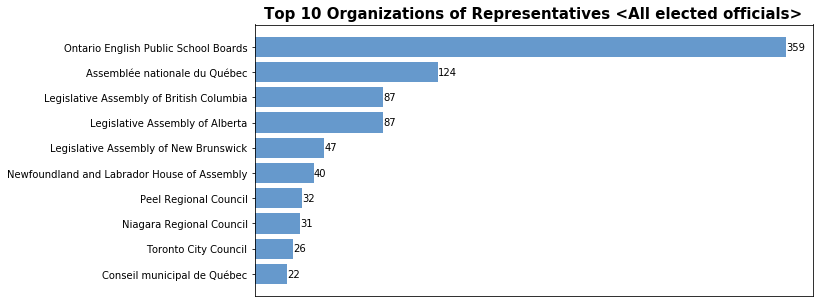

In [72]:
draw_barh(serr, 'Top 10 Organizations of Representatives <All elected officials>', './outputFile/Top 10 Organizations of Representatives All elected officials.png')

* Group by 'District name'. There are 656 different districts. We find the top 10 districts of representatives of All elected officials.

In [73]:
obj = representatives_df.groupby('District name')
obj.size()

District name
Abbotsford               9
Abbotsford South         1
Abbotsford West          1
Abbotsford-Mission       1
Abitibi-Est              1
                        ..
Woolwich                 1
York Centre              1
York Region DSB         13
York South-Weston        1
Îles-de-la-Madeleine     1
Length: 656, dtype: int64

In [74]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr.index

Index(['Leduc-Beaumont', 'Mount Scio', 'Mégantic', 'Nanaimo',
       'Nanaimo-North Cowichan', 'Nechako Lakes', 'Nelligan',
       'Mount PearlSouthlands', 'Nelson-Creston', 'New Maryland-Sunbury',
       ...
       'Lambton', 'Vancouver', 'Ward 7', 'Toronto DSB', 'Ward 6', 'Ward 5',
       'Ward 3', 'Ward 4', 'Ward 2', 'Ward 1'],
      dtype='object', name='District name', length=656)

In [75]:
serr=serr[len(serr)-10:len(serr)]
serr

District name
Lambton        17
Vancouver      18
Ward 7         18
Toronto DSB    23
Ward 6         29
Ward 5         36
Ward 3         50
Ward 4         50
Ward 2         54
Ward 1         63
dtype: int64

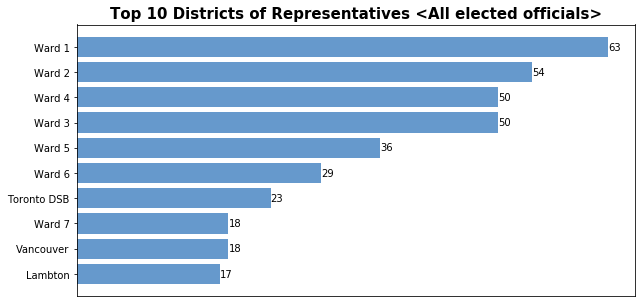

In [76]:
draw_barh(serr, 'Top 10 Districts of Representatives <All elected officials>', './outputFile/Top 10 districts of representatives of All elected officials.png')

* Group by 'Primary role'. 

In [77]:
obj = representatives_df.groupby('Primary role')
obj.size()

Primary role
Alderman                 8
Area Councillor          5
Chair                   93
Commissioner             7
Conseiller             158
Councillor             552
Councillor at Large      6
Deputy Mayor             3
Deputy Warden            1
Lord Mayor               1
MHA                     40
MLA                    221
MNA                    124
Maire                   15
Mayor                   70
Reeve                    1
Regional Chair           2
Regional Councillor     61
Trustee                267
Warden                   1
dtype: int64

In [78]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr

Primary role
Lord Mayor               1
Reeve                    1
Deputy Warden            1
Warden                   1
Regional Chair           2
Deputy Mayor             3
Area Councillor          5
Councillor at Large      6
Commissioner             7
Alderman                 8
Maire                   15
MHA                     40
Regional Councillor     61
Mayor                   70
Chair                   93
MNA                    124
Conseiller             158
MLA                    221
Trustee                267
Councillor             552
dtype: int64

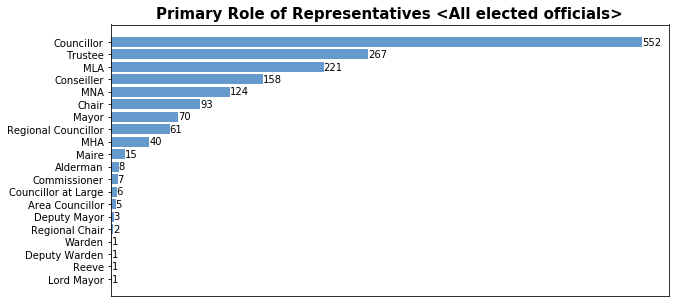

In [79]:
draw_barh(serr, 'Primary Role of Representatives <All elected officials>', './outputFile/Primary role of representatives of All elected officials.png')

* Group bu 'Office type'

In [80]:
obj = representatives_df.groupby('Office type')
obj.size()

Office type
constituency       9
legislature     1387
residence          7
dtype: int64

In [81]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr

Office type
residence          7
constituency       9
legislature     1387
dtype: int64

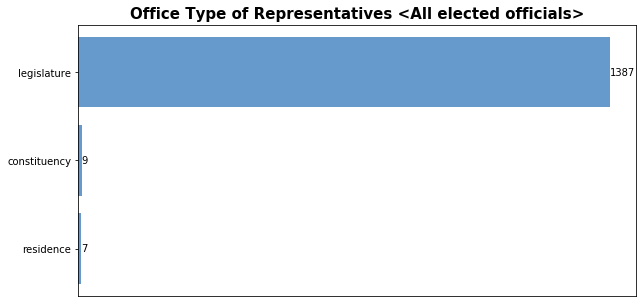

In [82]:
draw_barh(serr, 'Office Type of Representatives <All elected officials>', './outputFile/Office type of representatives of All elected officials.png')

## 3.3 Analyze Representatives : House of Commons

In [83]:
representatives_house_of_commons_df.head()

,District name,Primary role,Name,First name,Last name,Party name,Office type
0,Abbotsford,MP,Ed Fast,Ed,Fast,Conservative,legislature
1,Abitibi—Baie-James—Nunavik—Eeyou,MP,Romeo Saganash,Romeo,Saganash,NDP,legislature
2,Abitibi—Témiscamingue,MP,Christine Moore,Christine,Moore,NDP,legislature
3,Acadie—Bathurst,MP,Serge Cormier,Serge,Cormier,Liberal,legislature
4,Ahuntsic-Cartierville,MP,Mélanie Joly,Mélanie,Joly,Liberal,legislature


In [84]:
representatives_house_of_commons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
District name    333 non-null object
Primary role     333 non-null object
Name             333 non-null object
First name       333 non-null object
Last name        333 non-null object
Party name       333 non-null object
Office type      333 non-null object
dtypes: object(7)
memory usage: 18.3+ KB


In [85]:
len(representatives_house_of_commons_df['District name'].unique())

333

In [86]:
len(representatives_house_of_commons_df['Primary role'].unique())

1

In [87]:
len(representatives_house_of_commons_df['Party name'].unique())

8

In [88]:
len(representatives_house_of_commons_df['Office type'].unique())

1

* Group by 'Party name'

In [89]:
obj = representatives_house_of_commons_df.groupby('Party name')
obj.size()

Party name
Bloc Québécois                           10
Co-operative Commonwealth Federation      1
Conservative                             95
Green Party                               2
Independent                               8
Liberal                                 177
NDP                                      39
People's Party                            1
dtype: int64

In [90]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr

Party name
Co-operative Commonwealth Federation      1
People's Party                            1
Green Party                               2
Independent                               8
Bloc Québécois                           10
NDP                                      39
Conservative                             95
Liberal                                 177
dtype: int64

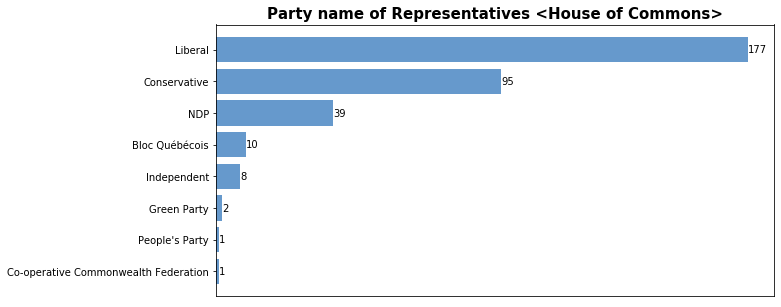

In [91]:
draw_barh(serr, 'Party name of Representatives <House of Commons>', './outputFile/Party name of Representatives House of Commons.png')

## 3.4 Analyze Provincial legislatures : Assemblée nationale du Québec

In [92]:
quebec_assemblee_nationale_df.head()

,District name,Primary role,Name,First name,Last name,Party name,Office type
0,Abitibi-Est,MNA,Pierre Dufour,Pierre,Dufour,Coalition avenir Québec,legislature
1,Abitibi-Ouest,MNA,Suzanne Blais,Suzanne,Blais,Coalition avenir Québec,legislature
2,Acadie,MNA,Christine St-Pierre,Christine,St-Pierre,Parti libéral du Québec,legislature
3,Anjou-Louis-Riel,MNA,Lise Thériault,Lise,Thériault,Parti libéral du Québec,legislature
4,Argenteuil,MNA,Agnès Grondin,Agnès,Grondin,Coalition avenir Québec,legislature


In [93]:
quebec_assemblee_nationale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
District name    124 non-null object
Primary role     124 non-null object
Name             124 non-null object
First name       124 non-null object
Last name        124 non-null object
Party name       124 non-null object
Office type      124 non-null object
dtypes: object(7)
memory usage: 6.9+ KB


In [94]:
len(quebec_assemblee_nationale_df['District name'].unique())

124

In [95]:
len(quebec_assemblee_nationale_df['Primary role'].unique())

1

In [96]:
len(quebec_assemblee_nationale_df['Party name'].unique())

5

In [97]:
len(quebec_assemblee_nationale_df['Office type'].unique())

2

In [98]:
quebec_assemblee_nationale_df['Office type'].unique()

array(['legislature', 'constituency'], dtype=object)

* Group by 'Party name'

In [99]:
obj = quebec_assemblee_nationale_df.groupby('Party name')
obj.size()

Party name
Coalition avenir Québec    75
Indépendant                 2
Parti libéral du Québec    28
Parti québécois             9
Québec solidaire           10
dtype: int64

In [100]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr

Party name
Indépendant                 2
Parti québécois             9
Québec solidaire           10
Parti libéral du Québec    28
Coalition avenir Québec    75
dtype: int64

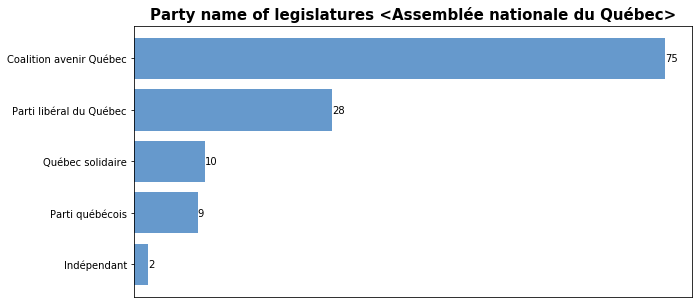

In [101]:
draw_barh(serr, 'Party name of legislatures <Assemblée nationale du Québec>', './outputFile/Party name of legislatures Assemblée nationale du Québec.png')

* Group by 'Office type'

In [102]:
obj = quebec_assemblee_nationale_df.groupby('Office type')
obj.size()

Office type
constituency      3
legislature     121
dtype: int64

In [103]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr

Office type
constituency      3
legislature     121
dtype: int64

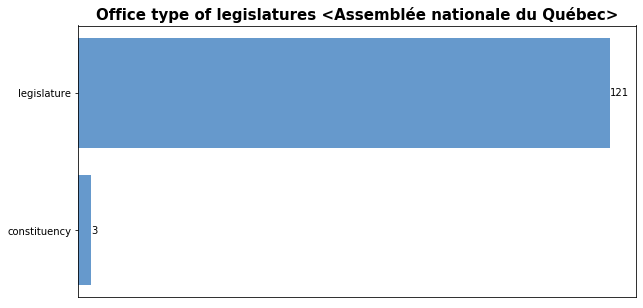

In [104]:
draw_barh(serr, 'Office type of legislatures <Assemblée nationale du Québec>', './outputFile/Office type of legislatures Assemblée nationale du Québec.png')

## 3.5 Analyze Quebec councils : Conseil municipal de Montréal

In [105]:
conseil_municipal_de_montreal_df.head()

,District name,Primary role,Name,First name,Last name,Gender,Party name,Office type
0,Ahuntsic,Conseiller de la ville,Nathalie Goulet,Nathalie,Goulet,F,Projet Montréal - Équipe Valérie Plante,legislature
1,Ahuntsic-Cartierville,Maire d'arrondissement,Émilie Thuillier,Émilie,Thuillier,F,Projet Montréal - Équipe Valérie Plante,legislature
2,Anjou,Conseiller de la ville,Andrée Hénault,Andrée,Hénault,F,Équipe Anjou,legislature
3,Anjou,Maire d'arrondissement,Luis Miranda,Luis,Miranda,M,Équipe Anjou,legislature
4,Bois-de-Liesse,Conseiller de la ville,Benoit Langevin,Benoit,Langevin,M,Ensemble Montréal,legislature


In [106]:
conseil_municipal_de_montreal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
District name    64 non-null object
Primary role     64 non-null object
Name             64 non-null object
First name       64 non-null object
Last name        64 non-null object
Gender           64 non-null object
Party name       64 non-null object
Office type      63 non-null object
dtypes: object(8)
memory usage: 4.1+ KB


In [107]:
len(conseil_municipal_de_montreal_df['District name'].unique())

62

In [108]:
conseil_municipal_de_montreal_df[conseil_municipal_de_montreal_df['District name'].duplicated()]

,District name,Primary role,Name,First name,Last name,Gender,Party name,Office type
3,Anjou,Maire d'arrondissement,Luis Miranda,Luis,Miranda,M,Équipe Anjou,legislature
22,Lachine,Maire d'arrondissement,Maja Vodanovic,Maja,Vodanovic,F,Projet Montréal - Équipe Valérie Plante,legislature


In [109]:
len(conseil_municipal_de_montreal_df['Primary role'].unique())

3

In [110]:
len(conseil_municipal_de_montreal_df['Party name'].unique())

5

In [111]:
len(conseil_municipal_de_montreal_df['Office type'].unique())

2

In [112]:
conseil_municipal_de_montreal_df['Office type'].unique()

array(['legislature', nan], dtype=object)

* Group by 'Primary role'

In [113]:
obj = conseil_municipal_de_montreal_df.groupby('Primary role')
obj.size()

Primary role
Conseiller de la ville           46
Maire d'arrondissement           17
Maire de la Ville de Montréal     1
dtype: int64

In [114]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr

Primary role
Maire de la Ville de Montréal     1
Maire d'arrondissement           17
Conseiller de la ville           46
dtype: int64

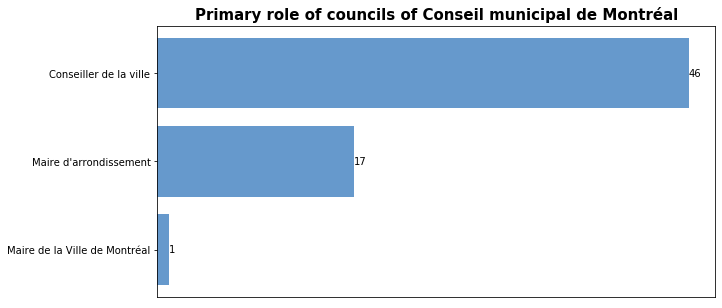

In [115]:
draw_barh(serr, 'Primary role of councils of Conseil municipal de Montréal', './outputFile/Primary role of councils of Conseil municipal de Montréal.png')

* Group by 'Party name'

In [116]:
obj = conseil_municipal_de_montreal_df.groupby('Party name')
obj.size()

Party name
Ensemble Montréal                          19
Indépendant                                 6
Projet Montréal - Équipe Valérie Plante    34
Équipe Anjou                                2
Équipe Barbe Team                           3
dtype: int64

In [117]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr

Party name
Équipe Anjou                                2
Équipe Barbe Team                           3
Indépendant                                 6
Ensemble Montréal                          19
Projet Montréal - Équipe Valérie Plante    34
dtype: int64

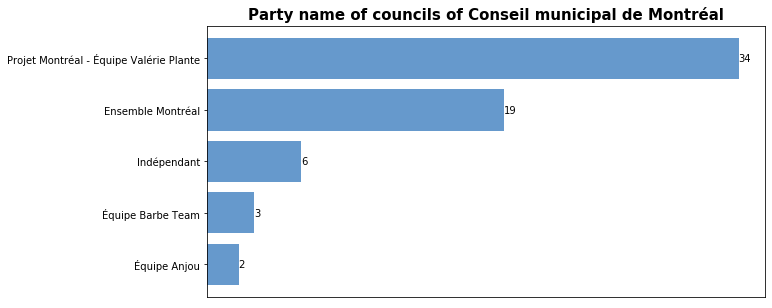

In [118]:
draw_barh(serr, 'Party name of councils of Conseil municipal de Montréal', './outputFile/Party name of councils of Conseil municipal de Montréal.png')

* Group by 'Gender'

In [119]:
obj = conseil_municipal_de_montreal_df.groupby('Gender')
obj.size()

Gender
F    30
M    34
dtype: int64

In [120]:
serr=pd.Series(obj.size()).sort_values(ascending=True)
serr

Gender
F    30
M    34
dtype: int64

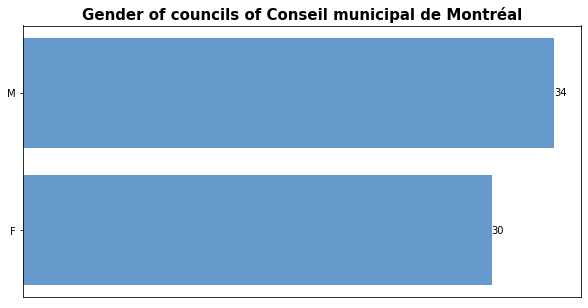

In [121]:
draw_barh(serr, 'Gender of councils of Conseil municipal de Montréal', './outputFile/Gender of councils of Conseil municipal de Montréal.png')